本书配套视频课程：[解剖深度学习原理，从0实现深度学习库](https://ke.qq.com/course/2900371?tuin=ac5537fd) 

更多代码或学习资料将向购买视频课程或书的学生提供。


+ 博客网站：[https://hwdong-net.github.io](https://hwdong-net.github.io)
+ youtube频道: [hwdong](http://www.youtube.com/c/hwdong)
+ bilibili网站：[hw-dong](https://space.bilibili.com/281453312)


# 梯度下降法

函数$f\left( x \right) = {x^3} – 3{x^2} – 9x + 2.$，及其导函数数$f’\left( x \right) $：

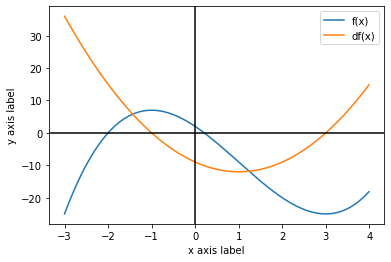

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(-3, 4, 0.01)
f_x = np.power(x,3)-3*x**2-9*x+2
df_x = 3*x**2-6*x-9

plt.plot(x,f_x)
plt.plot(x,df_x)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.legend(['f(x)', "df(x)"])
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.show()

$f(x) = {x^3}$的函数曲线

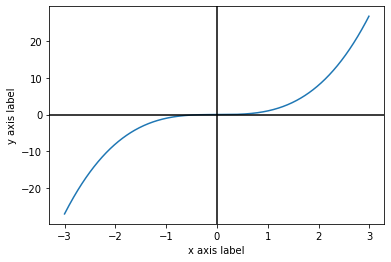

In [2]:
x = np.arange(-3, 3, 0.01)
f_x = np.power(x,3)

plt.plot(x,f_x)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.axvline(x=0, color='k')
plt.axhline(y=0, color='k')
plt.show()

梯度下降法的代码

In [3]:
def gradient_descent(df,x,alpha=0.01, iterations = 100,epsilon = 1e-8):
    history=[x]
    for i in range(iterations):
        if abs(df(x))<epsilon:
            print("梯度足够小！")
            break
        x = x-alpha* df(x)        
        history.append(x)
    return history

对于上面的函数$f\left( x \right) = {x^3} – 3{x^2} – 9x + 2$，其导数$f’\left( x \right) = 3x^2 – 6x – 9$。假如要求$x=1$附近函数$f(x)$的极小值，可以调用这个函数gradient_descent()：

In [4]:
df = lambda x: 3*x**2-6*x-9
path = gradient_descent(df,1.,0.01,200)
print(path[-1])

梯度足够小！
2.999999999256501


可以将迭代过程中的x对应的曲线上的点绘制出来：

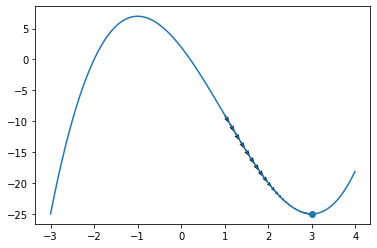

In [5]:
f = lambda x: np.power(x,3)-3*x**2-9*x+2
x = np.arange(-3, 4, 0.01)
y= f(x)
plt.plot(x,y)

path_x = np.asarray(path) #.reshape(-1,1)
path_y=f(path_x)
plt.quiver(path_x[:-1], path_y[:-1], path_x[1:]-path_x[:-1], path_y[1:]-path_y[:-1], scale_units='xy', angles='xy', scale=1, color='k')
plt.scatter(path[-1],f(path[-1]))
plt.show()

是wiki百科的 Beale's function函数。

$$f(x, y) = (1.5 - x + xy)^2 + (2.25 - x + xy^2)^2 + (2.625 - x + xy^3)^2$$

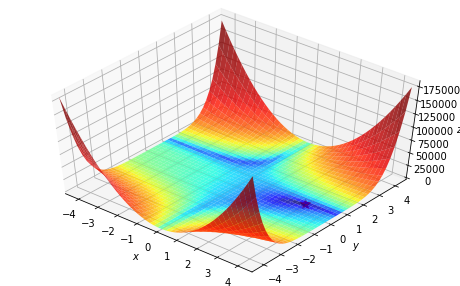

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib.colors import LogNorm
import random

%matplotlib inline

f  = lambda x, y: (1.5 - x + x*y)**2 + (2.25 - x + x*y**2)**2 + (2.625 - x + x*y**3)**2

minima = np.array([3., .5])
minima_ = minima.reshape(-1, 1)

xmin, xmax, xstep = -4.5, 4.5, .2
ymin, ymax, ystep = -4.5, 4.5, .2
x_list = np.arange(xmin, xmax + xstep, xstep)
y_list = np.arange(ymin, ymax + ystep, ystep)
x, y = np.meshgrid(x_list, y_list)
z = f(x, y)

fig = plt.figure(figsize=(8, 5))
ax = plt.axes(projection='3d', elev=50, azim=-50)

ax.plot_surface(x, y, z, norm=LogNorm(), rstride=1, cstride=1, 
                edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.plot(*minima_, f(*minima_), 'r*', markersize=10)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

可以用matplotlib的quiver函数在2D坐标平面上绘制出这些网格点处的梯度方向。

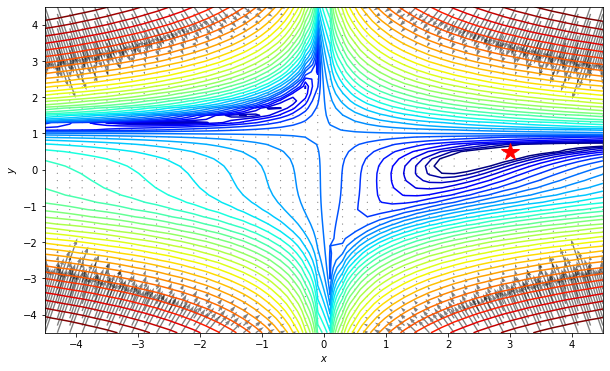

In [7]:
df_x  = lambda x, y: 2*(1.5 - x + x*y)*(y-1) + 2*(2.25 - x + x*y**2)*(y**2-1) + 2*(2.625 - x + x*y**3)*(y**3-1)
df_y  = lambda x, y: 2*(1.5 - x + x*y)*x + 2*(2.25 - x + x*y**2)*(2*x*y) + 2*(2.625 - x + x*y**3)*(3*x*y**2)
dz_dx = df_x(x, y)
dz_dy = df_y(x, y)

fig, ax = plt.subplots(figsize=(10, 6))

ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
ax.quiver(x, y, x - dz_dx, y - dz_dy, alpha=.5)
ax.plot(*minima_, 'r*', markersize=18)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')

ax.set_xlim((xmin, xmax))
ax.set_ylim((ymin, ymax))

plt.show()

可以定义一个针对这个向量化的坐标点x的梯度函数df，下面代码还给出了修改后的向量化版本梯度下降算法实现：

In [8]:
df = lambda x: np.array( [2*(1.5 - x[0] + x[0]*x[1])*(x[1]-1) + 2*(2.25 - x[0] + x[0]*x[1]**2)*(x[1]**2-1)
                                        + 2*(2.625 - x[0] + x[0]*x[1]**3)*(x[1]**3-1),
                           2*(1.5 - x[0] + x[0]*x[1])*x[0] + 2*(2.25 - x[0] + x[0]*x[1]**2)*(2*x[0]*x[1]) 
                                         + 2*(2.625 - x[0] + x[0]*x[1]**3)*(3*x[0]*x[1]**2)])

def gradient_descent(df,x,alpha=0.01, iterations = 100,epsilon = 1e-8):
    history=[x]
    for i in range(iterations):
        if np.max(np.abs(df(x)))<epsilon:
            print("梯度足够小！")
            break
        x = x-alpha* df(x)       
        history.append(x)
    return history

从x0=(3., 4.)出发求解这个曲面的极值点：

In [9]:
x0=np.array([3., 4.])
print("初始点",x0,"的梯度",df(x0))

path = gradient_descent(df,x0,0.000005,300000)
print("极值点：",path[-1])

初始点 [3. 4.] 的梯度 [25625.25 57519.  ]
极值点： [2.70735828 0.41689171]


可以通过绘制迭代过程中的x的变化情况，更直观地看清楚这种情况。

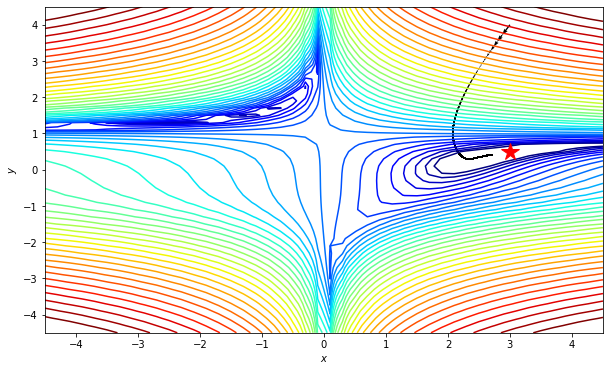

In [10]:
def plot_path(path,x,y,z,minima_,xmin, xmax,ymin, ymax):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.contour(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.jet)
    #ax.scatter(path[0],path[1]);
    ax.quiver(path[:-1,0], path[:-1,1], path[1:,0]-path[:-1,0], path[1:,1]-path[:-1,1], scale_units='xy', angles='xy', scale=1, color='k')
    ax.plot(*minima_, 'r*', markersize=18)

    ax.set_xlabel('$x$')
    ax.set_ylabel('$y$')    
    ax.set_xlim((xmin, xmax))
    ax.set_ylim((ymin, ymax))

path = np.asarray(path) 
plot_path(path,x,y,z,minima_,xmin, xmax,ymin, ymax)

## 2.3 梯度下降法的参数优化策

### 2.3.1 Momentum动量法

基于动量法的梯度下降法：

In [11]:
def gradient_descent_momentum(df,x,alpha=0.01,gamma = 0.8, iterations = 100,epsilon = 1e-6):
    history=[x]
    v= np.zeros_like(x)            #动量
    for i in range(iterations):
        if np.max(np.abs(df(x)))<epsilon:
            print("梯度足够小！")
            break
        v = gamma*v+alpha* df(x)  #更新动量
        x = x-v                   #更新变量（参数）
        
        history.append(x)
    return history

In [12]:
ath = gradient_descent_momentum(df,x0,0.000005,0.8,300000)
print(path[-1])
path = np.asarray(path) 

[2.70735828 0.41689171]


可以看到，动量法的解已经非常接近最优解了。

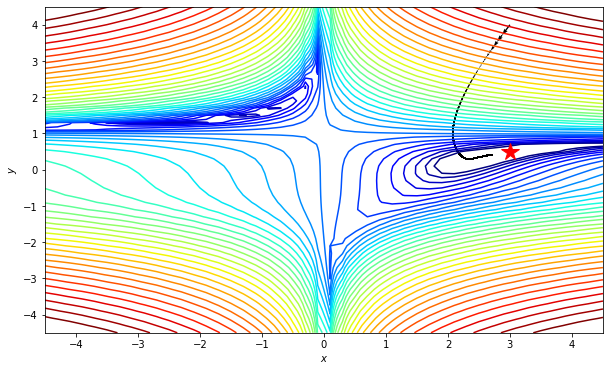

In [14]:
plot_path(path,x,y,z,minima_,xmin, xmax,ymin, ymax)

### 2.3.2 Adagrad法

In [15]:
def gradient_descent_Adagrad(df,x,alpha=0.01,iterations = 100,epsilon = 1e-8):
    history=[x]
    #v= np.zeros_like(x) 
    gl = np.ones_like(x)
    for i in range(iterations):
        if np.max(np.abs(df(x)))<epsilon:
            print("梯度足够小！")
            break
        grad = df(x)
        gl += grad**2
        x = x-alpha* grad/(np.sqrt(gl)+epsilon)      
        history.append(x)
    return history

In [16]:
path = gradient_descent_Adagrad(df,x0,0.1,300000,1e-8)
print(path[-1])
path = np.asarray(path) 

[-0.69240717  1.76233766]


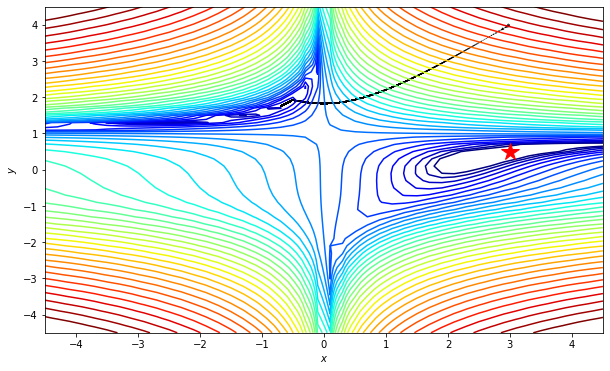

In [17]:
plot_path(path,x,y,z,minima_,xmin, xmax,ymin, ymax)

### 2.3.3  Adadelta法

In [18]:
def gradient_descent_Adadelta(df,x,alpha = 0.1,rho=0.9,iterations = 100,epsilon = 1e-8):
    history=[x]    
    Eg = np.ones_like(x)
    Edelta = np.ones_like(x)   
    for i in range(iterations):
        if np.max(np.abs(df(x)))<epsilon:
            print("梯度足够小！")
            break
        grad = df(x)
        Eg = rho*Eg+(1-rho)*(grad**2)        
        delta = np.sqrt((Edelta+epsilon)/(Eg+epsilon))*grad
        x = x- alpha*delta
        Edelta = rho*Edelta+(1-rho)*(delta**2)     
        history.append(x)
    return history

In [19]:
path = gradient_descent_Adadelta(df,x0,1.0,0.9,300000,1e-8)
print(path[-1])
path = np.asarray(path) 

[2.9386002  0.45044889]


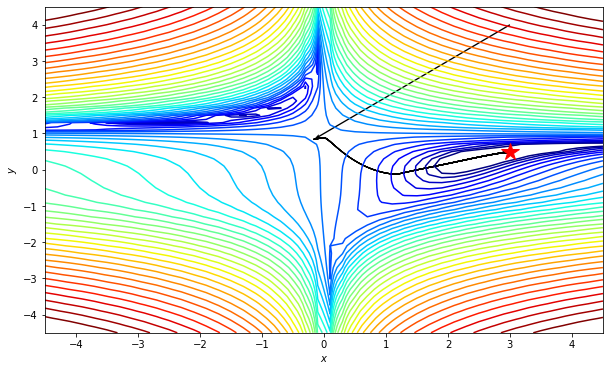

In [20]:
plot_path(path,x,y,z,minima_,xmin, xmax,ymin, ymax)

### 2.3.4 RMSprop法

In [21]:
def gradient_descent_RMSprop(df,x,alpha=0.01,beta = 0.9, iterations = 100,epsilon = 1e-8):
    history=[x]   
    v= np.ones_like(x)
    for i in range(iterations):
        if np.max(np.abs(df(x)))<epsilon:
            print("梯度足够小！")
            break
        grad = df(x)       
        v = beta*v+(1-beta)*grad**2       
        x = x-alpha*grad/(np.sqrt(v)+epsilon)
      
        history.append(x)
    return history

In [22]:
path = gradient_descent_RMSprop(df,x0,0.000005,0.99999999999,300000,1e-8)
print(path[-1])
path = np.asarray(path) 

[2.70162562 0.41500366]


模型参数的结果还不够好，可以增大迭代次数：

In [26]:
path = gradient_descent_RMSprop(df,x0,0.000005,0.99999999999,900000,1e-8)
print(path[-1])
path = np.asarray(path) 

[2.9082809  0.47616156]


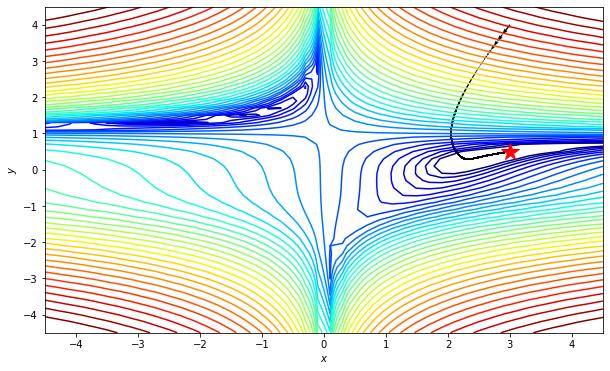

In [27]:
plot_path(path,x,y,z,minima_,xmin, xmax,ymin, ymax)

### 2.3.5 Adam法

In [28]:
def gradient_descent_Adam(df,x,alpha=0.01,beta_1 = 0.9,beta_2 = 0.999, iterations = 100,epsilon = 1e-8):
    history=[x]
    m = np.zeros_like(x)
    v = np.zeros_like(x)
    for t in range(iterations):
        if np.max(np.abs(df(x)))<epsilon:
            print("梯度足够小！")
            break
        grad = df(x)
        m = beta_1*m+(1-beta_1)*grad
        v = beta_2*v+(1-beta_2)*grad**2
        
        #m_1 = m/(1-beta_1)
        #v_1 = v/(1-beta_2) 
        t = t+1
        if True:
            m_1 = m/(1-np.power(beta_1, t+1))
            v_1 = v/(1-np.power(beta_2, t+1))     
        else:        
            m_1 = m / (1 - np.power(beta_1, t)) + (1 - beta_1) * grad / (1 - np.power(beta_1, t))
            v_1 = v / (1 - np.power(beta_2, t))
    
        x = x-alpha*m_1/(np.sqrt(v_1)+epsilon)
        #print(x)
        history.append(x)
    return history

In [29]:
path = gradient_descent_Adam(df,x0,0.001,0.9,0.8,100000,1e-8)
#path = gradient_descent_Adam(df,x0,0.000005,0.9,0.9999,300000,1e-8)
print(path[-1])
path = np.asarray(path) 
#plt.plot(path)

[2.99998362 0.50001619]


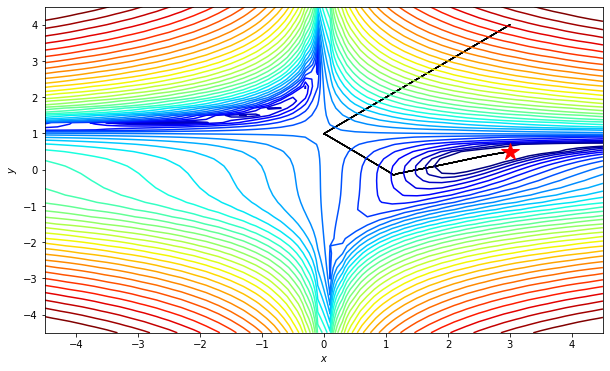

In [30]:
plot_path(path,x,y,z,minima_,xmin, xmax,ymin, ymax)

### 2.3.6 优化方法的再比较

单的凸函数曲面，

$$f(x,y) = \frac{1}{16}x^2+9y^2 \tag{2}$$

这是一个碗形曲面，其最小值在碗底，即(0,0)是整个函数的最小值点，最小值是0。下面代码绘制这个曲面：

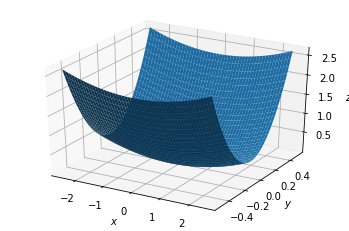

In [31]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot
import matplotlib.pyplot as plt
import random

%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm

f = lambda x: (1/16)*x[0]**2+9*x[1]**2

xmin, xmax = -2.5,2.5
ymin, ymax = -0.5,0.5

N=1000
x_list = np.linspace(-2.5, 2.5, N)
y_list = np.linspace(-0.5, 0.5, N)
x,y = np.meshgrid(x_list, y_list)
z  = (1/16)*x**2+9*y**2

minima = np.array([0., 0.])
minima_ = minima.reshape(-1, 1)
minima_

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z)
#ax.plot_surface(X, Y, Z, norm=LogNorm(), rstride=1, cstride=1, edgecolor='none', alpha=.8, cmap=plt.cm.jet)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')

#ax.plot(*minima_, f(minima_), 'r*', markersize=10)

#ax.set_xlim((xmin, xmax))
#ax.set_ylim((ymin, ymax))
plt.show()

用matplotlib包的contour()在函数的自变量平面上绘制函数的等值曲线图如下：

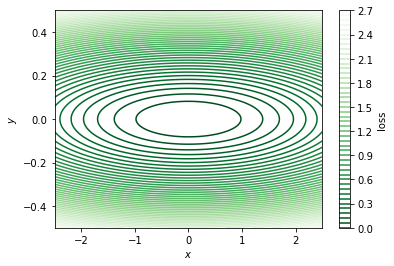

In [32]:
def plot_path(path,x,y,z,minima_,xmin, xmax,ymin, ymax):
    cp = plt.contour(x, y, z, 50, cmap=plt.cm.get_cmap('Greens_r'))
    #plt.contour(X, Y, Z,levels=np.logspace(-5, 5, 100), norm=LogNorm(), cmap=plt.cm.jet)
    if path is not None:
      plt.quiver(path[0,:-1], path[1,:-1], path[0,1:]-path[0,:-1], path[1,1:]-path[1,:-1], scale_units='xy', angles='xy', scale=1, color='k')
    cbar = plt.colorbar(cp)
    cbar.set_label('loss')
 
    plt.xlabel('$x$')
    plt.ylabel('$y$')
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.show()  

    
plot_path(None,x,y,z,minima_,xmin, xmax,ymin, ymax)

基本的梯度下降法并绘制变量更新过程：

[-6.82215640e-01  4.07407195e-11]
[array([-2.4,  0.2]), array([-2.37, -0.16]), array([-2.340375,  0.128   ]), array([-2.31112031, -0.1024    ]), array([-2.28223131,  0.08192   ])]


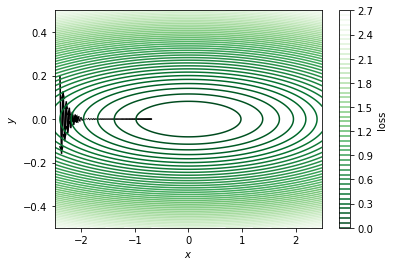

In [33]:
df = lambda x: np.array( ((1/8)*x[0],18*x[1]))

x0=np.array([-2.4, 0.2])
path = gradient_descent(df,x0,0.1,100)
print(path[-1])
print(path[:5])
path = np.asarray(path) 
path = path.transpose()

plot_path(path,x,y,z,minima_,xmin, xmax,ymin, ymax)

动量法的梯度下降：

[8.79660540e-05 2.85449539e-06]


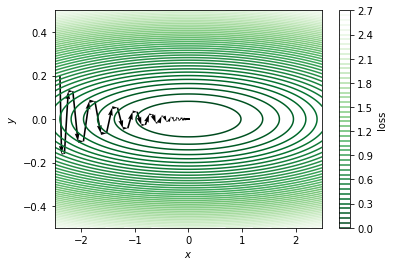

In [34]:
path = gradient_descent_momentum(df,x0,0.1,0.8,100,1e-12)
print(path[-1])
path = np.asarray(path) 
path = path.transpose()

plot_path(path,x,y,z,minima_,xmin, xmax,ymin, ymax)

AdaGrad法。

梯度足够小！
[-7.56167049e-008  3.75576934e-120]


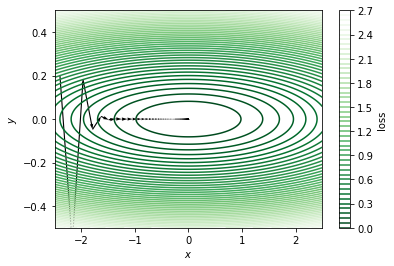

In [35]:
path = gradient_descent_Adagrad(df,x0,0.8,300,1e-8)
print(path[-1])
path = np.asarray(path) 
path = path.transpose()
plot_path(path,x,y,z,minima_,xmin, xmax,ymin, ymax)

Adadelta法：

[-6.15257091e-01  1.33880609e-26]


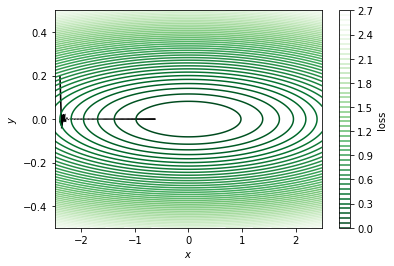

In [36]:
path = gradient_descent_Adadelta(df,x0,0.1,0.9,100,1e-8)
print(path[-1])
path = np.asarray(path) 
path = path.transpose()
plot_path(path,x,y,z,minima_,xmin, xmax,ymin, ymax)

RMSprop法

[-7.3135847e-20  4.8882380e-02]


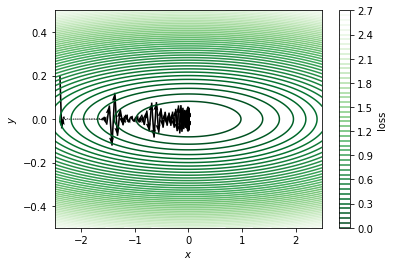

In [37]:
path = gradient_descent_RMSprop(df,x0,0.1,0.9,100,1e-8)
print(path[-1])
path = np.asarray(path) 
path = path.transpose()
plot_path(path,x,y,z,minima_,xmin, xmax,ymin, ymax)

最后看看Adam法的情况：

[-1.30126876e-06 -1.84625022e-03]


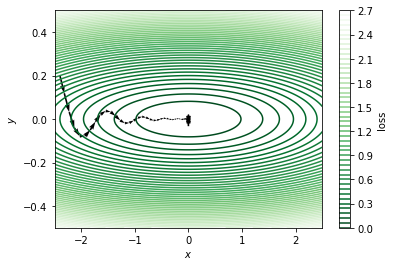

In [38]:
path = gradient_descent_Adam(df,x0,0.1,0.7,0.9,100,1e-8)
print(path[-1])
path = np.asarray(path) 
path = path.transpose()
plot_path(path,x,y,z,minima_,xmin, xmax,ymin, ymax)

## 2.4  梯度验证

例如对于前面的二元函数$f(x,y) = \frac{1}{16}x^2+9y^2$，梯度下降法中该函数在一个点$x =(x_0,x_1)$的函数值和分析梯度是通过下面代码计算的。

In [39]:
f = lambda x: (1/16)*x[0]**2+9*x[1]**2
df = lambda x: np.array( ((1/8)*x[0],18*x[1]))

在该点$x =(x_0,x_1)$的数值梯度可以如下计算：

In [40]:
df_approx = lambda x,eps:((f([x[0]+eps,x[1]])-f([x[0]-eps,x[1]]) )/(2*eps),( f([x[0],x[1]+eps])-f([x[0],x[1]-eps]) )/(2*eps))

下面代码片段在点 𝑥=[2.,3.] 比较分析和数值梯度的误差:

In [41]:
x = [2.,3.]
eps = 1e-8
grad = df(x)
grad_approx = df_approx(x,eps)
print(grad)
print(grad_approx)
print(abs(grad-grad_approx))

[ 0.25 54.  ]
(0.2500001983207767, 54.00000020472362)
[1.98320777e-07 2.04723619e-07]


### 2.4.2  通用的数值梯度

def numerical_gradient(f,params,eps = 1e-6):
    numerical_grads = []
    for x in params:
        # x可能是一个多维数组，对其每个元素，计算其数值偏导数        
        grad = np.zeros(x.shape)
        it = np.nditer(x, flags=['multi_index'], op_flags=['readwrite']) #
        while not it.finished:            
            idx = it.multi_index
            old_value = x[idx]        
            x[idx] = old_value + eps  # x[idx]+eps
            fx = f()  
            x[idx] = old_value - eps #  x[idx]-eps
            fx_ = f()
            grad[idx] = (fx - fx_) / (2*eps)  
            x[idx] = old_value      #注意：一定要将该权值参数恢复到原来的值。
            it.iternext()           # 循环访问x的下一个元素            
      
        numerical_grads.append(grad)
    return numerical_grads

可以用这个通用的数值梯度计算函数去计算前面的函数的数值梯度：

In [44]:
x = np.array([2.,3.])
param = np.array(x)        #numerical_gradient的参数param必须是numpy数组
numerical_grads = numerical_gradient(lambda:f(param),[param],1e-6)
print(numerical_grads[0])

[ 0.25       54.00000001]


对一个包含一些参数如param的函数f，通常可用上面的lambda表达式或下面的包裹函数fun，返回一个在参数param上执行计算的函数对象。

In [46]:
def fun():
    return f(param)

numerical_grads = numerical_gradient(fun,[param],1e-6)
print(numerical_grads[0])

[ 0.25       54.00000001]


### 2.5 分离梯度下降算法与参数优化策略

### 2.5.1 参数优化器

可以定义一个表示参数优化策略的类：

In [47]:
class Optimizator:
    def __init__(self,params):
        self.params = params   
                
    def step(self,grads): 
       pass
    def parameters(self):
        return self.params

在该类基础上派生定义采用基本梯度下降法的参数优化策略的参数优化器类Opt_Basic：

In [48]:
class Opt_Basic(Optimizator):
    def __init__(self,params,learning_rate):
        super().__init__(params)
        self.lr = learning_rate   
                
    def step(self,grads): 
        for i in range(len(self.params)):
            self.params[i] -= self.lr*grads[i] 
        return self.params

可以定义其他的参数优化器，如动量法的Opt_Momentum：

In [49]:
class Opt_Momentum(Optimizator):
    def __init__(self,params,learning_rate,gamma):
        super().__init__(params)
        self.lr = learning_rate        
        self.gamma= gamma
        self.v = []
        for param in params:
            self.v.append(np.zeros_like(param) )
                
    def step(self,grads): 
        for i in range(len(self.params)):
            self.v[i] = self.gamma*self.v[i]+self.lr* grads[i]
            self.params[i] -= self.v[i]
        return self.params

### 2.5.2 接受参数优化器的梯度下降法

梯度下降算法只要接受对参数更行的参数优化器就可以按照该优化器的优化策略对参数进行更新：

In [50]:
def gradient_descent_(df,optimizator,iterations,epsilon = 1e-8):
    x, = optimizator.parameters()
    x = x.copy()
    history=[x]    
    for i in range(iterations):
        if np.max(np.abs(df(x)))<epsilon:
            print("梯度足够小！")
            break
        grad = df(x)
        x, = optimizator.step([grad])
        x = x.copy()
        history.append(x)
    return history

In [51]:
import numpy  as np
df = lambda x: np.array( ((1/8)*x[0],18*x[1]))
x0=np.array([-2.4, 0.2])

optimizator = Opt_Basic([x0],0.1)
path = gradient_descent_(df,optimizator,1000)
print(path[-1])
path = np.asarray(path) 
path = path.transpose()
#plot_path(path,x,y,z,minima_,xmin, xmax,ymin, ymax)

[-8.26638332e-06  2.46046384e-98]


换用Opt_Momentum优化器：

In [52]:
x0=np.array([-2.4, 0.2])
optimizator = Opt_Momentum([x0],0.1,0.8)
path = gradient_descent_(df,optimizator,1000)
print(path[-1])
path = np.asarray(path) 
path = path.transpose()
#plot_path(path,x,y,z,minima_,xmin, xmax,ymin, ymax)

梯度足够小！
[-1.49829905e-08 -4.74284398e-10]
